In [1]:
import pandas as pd
import numpy as np
import csv
import rasterio
import json
import sys
import os
from rasterio.mask import mask
import matplotlib.pyplot as plt

## For 1 district

In [47]:
district_file = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\District-Level Training\districtTiffFiles200\Adilabad@28@532.tiff"

In [41]:
# print('Count of bands-',dataset.count)
# print('Width of Image-',dataset.width)
# print('Height of Image-',dataset.height)
# print('Datatype of Band-',{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)})
# print(dataset.bounds)

#### Order of bands, starting from 1

B1, B2, B3, B4, B5, B6_VCID_1, B6_VCID_2, B7, B8, BQA

In [53]:
dataset = rasterio.open(district_file)

band_b1 = dataset.read(1)
band_b2 = dataset.read(2)
band_b3 = dataset.read(3)
band_b4 = dataset.read(4)
band_b5 = dataset.read(5)
band_b6_vcid_1 = dataset.read(6)
band_b6_vcid_2 = dataset.read(7)
band_b7 = dataset.read(8)
band_b8 = dataset.read(9)
band_bqa = dataset.read(10)

In [78]:
band_b4.shape

(297, 211)

In [79]:
band_ndvi = (band_b4 - band_b3)/(band_b4 + band_b3)

c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [80]:
band_ndvi.shape

(297, 211)

In [61]:
all_bands = np.dstack((band_b1, band_b2, band_b3, band_b4, band_b5, band_b6_vcid_1, band_b6_vcid_2, band_b7, band_b8, band_bqa))

In [97]:
all_bands.shape

(297, 211, 10)

In [64]:
all_bands[:,:,0].shape

(686, 1235)

In [93]:
band_ndbi = (band_b5 - band_b4)/(band_b5 + band_b4)
band_ndwi = (band_b4 - band_b5)/(band_b4 + band_b5)

c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [98]:
all_bands.shape

(297, 211, 10)

In [99]:
flatten_data = all_bands.flatten()

In [100]:
flatten_data.shape

(626670,)

In [ ]:
plt.imshow(band_ndwi)

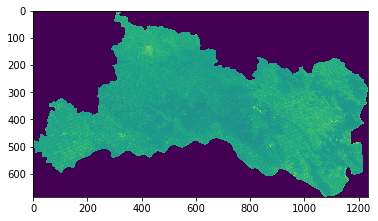

In [65]:
plt.imshow(all_bands[:,:,0])

##  Converting images to numpy array and storing the arrays in a list

In [13]:
folder_path = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\District-Level Training\districtTiffFiles500"

In [14]:
district_array = {}
for file in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file)
    district_name = file.split('@')[0]
    st_cen_cd = file.split('@')[1]
    censuscode = file.split('@')[2].split('.')[0]
    #print(district_name)
    
    dataset = rasterio.open(file_name)
    band_b1 = dataset.read(1)
    band_b2 = dataset.read(2)
    band_b3 = dataset.read(3)
    band_b4 = dataset.read(4)
    band_b5 = dataset.read(5)
    band_b6_vcid_1 = dataset.read(6)
    band_b6_vcid_2 = dataset.read(7)
    band_b7 = dataset.read(8)
    band_b8 = dataset.read(9)
    band_bqa = dataset.read(10)
    
#     band_ndvi = (band_b4 - band_b3)/(band_b4 + band_b3)
#     band_ndbi = (band_b5 - band_b4)/(band_b5 + band_b4)
#     band_ndwi = (band_b4 - band_b5)/(band_b4 + band_b5)
#     band_mndwi = (band_b2 - band_b5)/(band_b2 + band_b5)
    
    all_bands = np.dstack((band_b1, band_b2, band_b3, band_b4, band_b5, band_b6_vcid_1, band_b6_vcid_2, band_b7, band_b8, band_bqa))
#     all_bands = np.dstack((band_b1, band_b2, band_b3, band_b4, band_b5, band_b6_vcid_1, band_b6_vcid_2, band_b7, band_b8, band_bqa, band_ndvi, band_ndbi, band_ndwi))
    #exec('all_bands_'+censuscode+ '= np.dstack((band_b1, band_b2, band_b3, band_b4, band_b5, band_b6_vcid_1, band_b6_vcid_2, band_b7, band_b8, band_bqa))')
    #district_array[all_bands_] = all_bands
    #exec('district_array[all_bands_'+censuscode+'] = all_bands') 
    
    #all_bands = all_bands.flatten()
    district_array[censuscode] = all_bands

In [91]:
for key, value in district_array.items():
    #print(value.shape)
    #value = value[:,:,0]
    total_values = len(value.flatten())
    zero_values = len(value.flatten()[value.flatten() == 0])
    null_values = len(np.isnan(value.flatten())[np.isnan(value.flatten()) == True])
    print(key,': % Null Values:', float("{0:.2f}".format((null_values/total_values)*100)), '% Zero Values:',float("{0:.2f}".format((zero_values/total_values)*100)))
    #print('-------')

532 : % Null Values: 0.0 % Zero Values: 49.69
146 : % Null Values: 0.0 % Zero Values: 61.68
474 : % Null Values: 0.0 % Zero Values: 63.1
522 : % Null Values: 0.0 % Zero Values: 55.18
283 : % Null Values: 0.0 % Zero Values: 50.78
119 : % Null Values: 0.0 % Zero Values: 60.07
501 : % Null Values: 0.0 % Zero Values: 48.29
598 : % Null Values: 34.58 % Zero Values: 65.42
143 : % Null Values: 0.0 % Zero Values: 49.83
465 : % Null Values: 0.0 % Zero Values: 43.68
175 : % Null Values: 0.0 % Zero Values: 40.92
64 : % Null Values: 21.29 % Zero Values: 49.96
104 : % Null Values: 0.0 % Zero Values: 40.19
70 : % Null Values: 0.0 % Zero Values: 58.22
178 : % Null Values: 0.0 % Zero Values: 53.71
503 : % Null Values: 0.0 % Zero Values: 52.8
480 : % Null Values: 0.0 % Zero Values: 65.31
49 : % Null Values: 0.0 % Zero Values: 52.2
482 : % Null Values: 0.0 % Zero Values: 51.6
553 : % Null Values: 0.0 % Zero Values: 39.23
14 : % Null Values: 0.0 % Zero Values: 46.98
260 : % Null Values: 3.25 % Zero Value

99 : % Null Values: 0.0 % Zero Values: 59.4
388 : % Null Values: 0.0 % Zero Values: 46.71
508 : % Null Values: 0.0 % Zero Values: 50.16
346 : % Null Values: 0.0 % Zero Values: 49.56
61 : % Null Values: 41.35 % Zero Values: 43.24
141 : % Null Values: 0.0 % Zero Values: 53.76
236 : % Null Values: 0.0 % Zero Values: 49.72
140 : % Null Values: 0.0 % Zero Values: 52.45
195 : % Null Values: 0.0 % Zero Values: 42.77
349 : % Null Values: 0.0 % Zero Values: 45.1
302 : % Null Values: 0.0 % Zero Values: 48.43
351 : % Null Values: 53.91 % Zero Values: 42.2
313 : % Null Values: 0.0 % Zero Values: 67.13
183 : % Null Values: 0.0 % Zero Values: 50.22
507 : % Null Values: 0.0 % Zero Values: 45.35
217 : % Null Values: 0.0 % Zero Values: 57.69
188 : % Null Values: 0.0 % Zero Values: 45.28
579 : % Null Values: 0.0 % Zero Values: 46.16
366 : % Null Values: 0.0 % Zero Values: 46.85
458 : % Null Values: 0.0 % Zero Values: 51.16
548 : % Null Values: 0.0 % Zero Values: 48.11
35 : % Null Values: 0.0 % Zero Valu

c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in equal
  """


639 : % Null Values: 10.67 % Zero Values: 88.7
337 : % Null Values: 0.0 % Zero Values: 60.89
92 : % Null Values: 0.0 % Zero Values: 62.96
585 : % Null Values: 0.0 % Zero Values: 55.95
292 : % Null Values: 0.0 % Zero Values: 51.33
90 : % Null Values: 0.0 % Zero Values: 31.51
241 : % Null Values: 64.82 % Zero Values: 33.47
91 : % Null Values: 0.0 % Zero Values: 48.71
394 : % Null Values: 0.0 % Zero Values: 43.17
525 : % Null Values: 0.0 % Zero Values: 59.43
353 : % Null Values: 51.49 % Zero Values: 48.51
593 : % Null Values: 44.56 % Zero Values: 53.81
358 : % Null Values: 0.0 % Zero Values: 40.51
118 : % Null Values: 0.0 % Zero Values: 59.97
89 : % Null Values: 0.0 % Zero Values: 40.28
484 : % Null Values: 0.0 % Zero Values: 41.2
69 : % Null Values: 0.0 % Zero Values: 56.0
75 : % Null Values: 0.0 % Zero Values: 34.41
426 : % Null Values: 0.0 % Zero Values: 48.74
248 : % Null Values: 15.6 % Zero Values: 53.71
513 : % Null Values: 0.0 % Zero Values: 46.59
203 : % Null Values: 0.0 % Zero Va

605 : % Null Values: 0.0 % Zero Values: 61.64
443 : % Null Values: 0.0 % Zero Values: 38.22
607 : % Null Values: 15.42 % Zero Values: 54.36
625 : % Null Values: 3.64 % Zero Values: 73.04
544 : % Null Values: 0.0 % Zero Values: 53.67
543 : % Null Values: 0.0 % Zero Values: 56.6
540 : % Null Values: 0.0 % Zero Values: 54.91
504 : % Null Values: 0.0 % Zero Values: 56.12
502 : % Null Values: 0.0 % Zero Values: 54.91
590 : % Null Values: 3.66 % Zero Values: 50.24
293 : % Null Values: 0.0 % Zero Values: 36.67
546 : % Null Values: 0.0 % Zero Values: 45.11
246 : % Null Values: 60.01 % Zero Values: 39.87
296 : % Null Values: 0.0 % Zero Values: 37.7
440 : % Null Values: 0.0 % Zero Values: 41.72
250 : % Null Values: 0.0 % Zero Values: 50.73
289 : % Null Values: 0.0 % Zero Values: 56.63
242 : % Null Values: 62.33 % Zero Values: 37.67
96 : % Null Values: 0.0 % Zero Values: 44.59
264 : % Null Values: 0.0 % Zero Values: 48.04
551 : % Null Values: 0.0 % Zero Values: 44.95
580 : % Null Values: 0.0 % Ze

### Band 6, 7, 10 that are band_b6_vcid_1, band_b6_vcid_2, band_bqa have exploding values

(array([5.8882e+04, 1.0000e+00, 4.0000e+00, 4.9000e+01, 2.5000e+02,
        4.9950e+03, 2.3796e+04, 2.2061e+04, 1.4610e+03, 1.9000e+01]),
 array([-2.11016632e-05,  1.60535760e-02,  3.21282521e-02,  4.82029282e-02,
         6.42776042e-02,  8.03522840e-02,  9.64269638e-02,  1.12501636e-01,
         1.28576308e-01,  1.44650996e-01,  1.60725668e-01], dtype=float32),
 <a list of 10 Patch objects>)

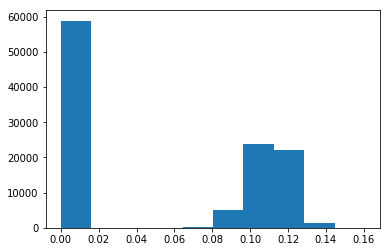

In [137]:
a = district_array['503'][:,:,1]
bins_6 = np.array([0,285,295,300,305,310,400])
plt.hist(a.flatten())

In [107]:
a.shape
aa = set(a.flatten())

(108, 140, 10)

In [82]:
total_values = len(a.flatten())
zero_values = len(a.flatten()[a.flatten() == 0])

In [21]:
folder_path = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\District-Level Training\districtTiffFiles500"

In [22]:
district_array_500 = {}
for file in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file)
    district_name = file.split('@')[0]
    st_cen_cd = file.split('@')[1]
    censuscode = file.split('@')[2].split('.')[0]
    #print(district_name)
    
    dataset = rasterio.open(file_name)
    band_b1 = dataset.read(1)
    band_b2 = dataset.read(2)
    band_b3 = dataset.read(3)
    band_b4 = dataset.read(4)
    band_b5 = dataset.read(5)
    band_b6_vcid_1 = dataset.read(6)
    band_b6_vcid_2 = dataset.read(7)
    band_b7 = dataset.read(8)
    band_b8 = dataset.read(9)
    band_bqa = dataset.read(10)
    
    band_ndvi = (band_b4 - band_b3)/(band_b4 + band_b3)
    band_ndbi = (band_b5 - band_b4)/(band_b5 + band_b4)
    band_ndwi = (band_b4 - band_b5)/(band_b4 + band_b5)
    #band_mndwi = (band_b2 - band_b5)/(band_b2 + band_b5)
    
    all_bands = np.dstack((band_b1, band_b2, band_b3, band_b4, band_b5, band_b6_vcid_1, band_b6_vcid_2, band_b7, band_b8, band_bqa, band_ndvi, band_ndbi, band_ndwi))
    #exec('all_bands_'+censuscode+ '= np.dstack((band_b1, band_b2, band_b3, band_b4, band_b5, band_b6_vcid_1, band_b6_vcid_2, band_b7, band_b8, band_bqa))')
    #district_array[all_bands_] = all_bands
    #exec('district_array[all_bands_'+censuscode+'] = all_bands') 
    
    #all_bands = all_bands.flatten()
    district_array_500[censuscode] = all_bands

c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract
c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\ipyke

In [23]:
for key, value in district_array_500.items():
    print(key,' ',value.shape)

532   (275, 494, 13)
146   (149, 318, 13)
474   (343, 276, 13)
522   (369, 439, 13)
283   (254, 131, 13)
119   (296, 323, 13)
501   (216, 208, 13)
598   (180, 93, 13)
143   (133, 255, 13)
465   (161, 160, 13)
175   (211, 186, 13)
64   (124, 231, 13)
104   (260, 242, 13)
70   (113, 149, 13)
178   (110, 204, 13)
503   (274, 407, 13)
480   (302, 326, 13)
49   (128, 205, 13)
482   (131, 200, 13)
553   (345, 381, 13)
14   (196, 146, 13)
260   (189, 254, 13)
384   (256, 252, 13)
461   (173, 239, 13)
209   (144, 147, 13)
616   (120, 128, 13)
240   (60, 97, 13)
459   (173, 179, 13)
162   (130, 119, 13)
235   (145, 168, 13)
515   (288, 291, 13)
191   (182, 187, 13)
2   (91, 120, 13)
556   (213, 299, 13)
63   (141, 154, 13)
139   (116, 84, 13)
180   (300, 164, 13)
324   (84, 216, 13)
457   (241, 342, 13)
393   (206, 221, 13)
377   (268, 253, 13)
193   (141, 215, 13)
182   (176, 166, 13)
469   (196, 395, 13)
170   (209, 209, 13)
9   (125, 238, 13)
583   (256, 175, 13)
572   (128, 113, 13)
225   (

403   (323, 196, 13)
520   (286, 185, 13)
410   (470, 323, 13)
446   (213, 324, 13)
442   (184, 228, 13)
476   (368, 329, 13)
408   (383, 185, 13)
6   (114, 120, 13)
123   (287, 199, 13)
584   (212, 126, 13)
626   (190, 218, 13)
17   (108, 91, 13)
361   (116, 153, 13)
136   (174, 129, 13)
364   (186, 230, 13)
537   (193, 333, 13)
434   (185, 262, 13)
528   (352, 187, 13)
396   (237, 257, 13)
20   (147, 125, 13)
430   (194, 281, 13)
85   (112, 129, 13)
297   (107, 214, 13)
82   (95, 154, 13)
234   (194, 215, 13)
58   (132, 121, 13)
51   (155, 100, 13)
472   (320, 208, 13)
427   (285, 288, 13)
132   (189, 183, 13)
214   (108, 126, 13)
352   (141, 117, 13)
52   (131, 96, 13)
288   (192, 85, 13)
608   (148, 267, 13)
221   (140, 197, 13)
22   (82, 121, 13)
372   (282, 217, 13)
531   (204, 443, 13)
53   (214, 144, 13)
186   (156, 88, 13)
198   (80, 115, 13)
369   (150, 163, 13)
219   (133, 177, 13)
527   (244, 306, 13)
429   (274, 231, 13)
108   (219, 223, 13)
445   (252, 354, 13)
272   (229